In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('diamonds')

# 2. Adım: Veriye ilk bakış
print("Veri Setinin İlk 5 Satırı:")
print(df.head())

print("\nEksik Değer Sayısı:")
print(df.isnull().sum())

print("\nSütun Tipleri:")
print(df.dtypes)

Veri Setinin İlk 5 Satırı:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Eksik Değer Sayısı:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Sütun Tipleri:
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [22]:
df_final = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

print(df_final.head())

   carat  depth  table  price     x     y     z  cut_Premium  cut_Very Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43        False          False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         True          False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31        False          False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         True          False   
4   0.31   63.3   58.0    335  4.34  4.35  2.75        False          False   

   cut_Good  ...  color_H  color_I  color_J  clarity_VVS1  clarity_VVS2  \
0     False  ...    False    False    False         False         False   
1     False  ...    False    False    False         False         False   
2      True  ...    False    False    False         False         False   
3     False  ...    False     True    False         False         False   
4      True  ...    False    False     True         False         False   

   clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  clarity_I1  
0     

In [23]:
from sklearn.model_selection import train_test_split

X = df_final.drop('price', axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {len(X_train)}")
print(f"Test seti boyutu: {len(X_test)}")

Eğitim seti boyutu: 43152
Test seti boyutu: 10788


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R-Kare Skoru: {r2_score(y_test, y_pred):.4f}")
print(f"Ortalama Hata (MAE): {mean_absolute_error(y_test, y_pred):.2f} $")

R-Kare Skoru: 0.9189
Ortalama Hata (MAE): 737.15 $


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print(f"Random Forest R-Kare Skoru: {r2_score(y_test, rf_pred):.4f}")
print(f"Random Forest Ortalama Hata (MAE): {mean_absolute_error(y_test, rf_pred):.2f} $")

Random Forest R-Kare Skoru: 0.9805
Random Forest Ortalama Hata (MAE): 277.05 $


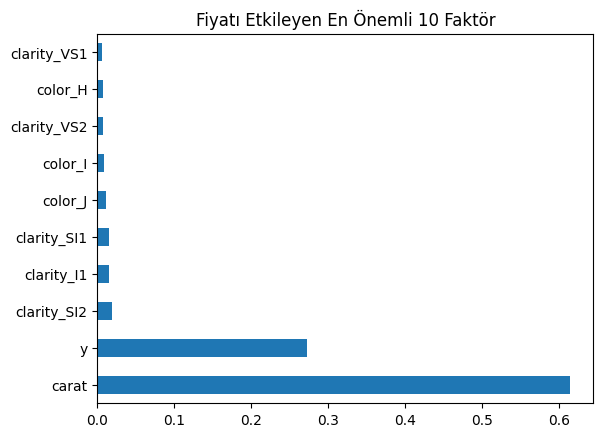

In [26]:

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Fiyatı Etkileyen En Önemli 10 Faktör')
plt.show()

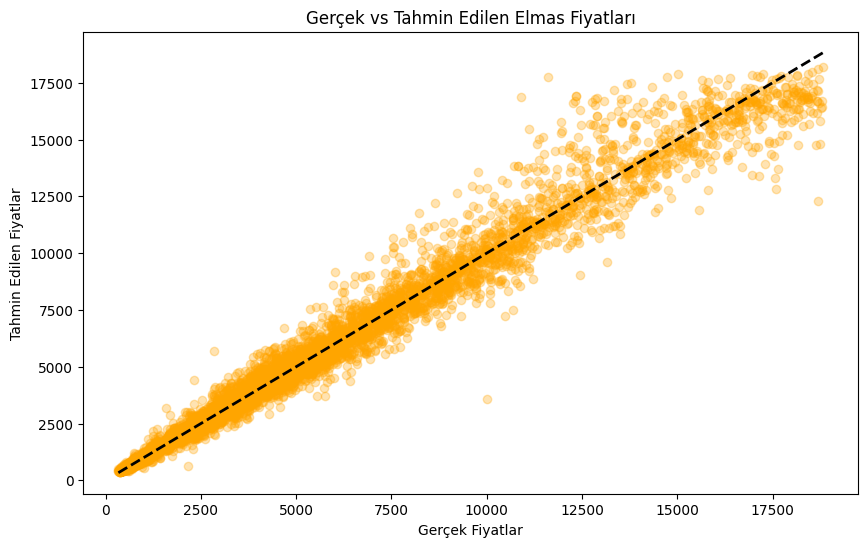

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_pred, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Gerçek vs Tahmin Edilen Elmas Fiyatları')
plt.show()

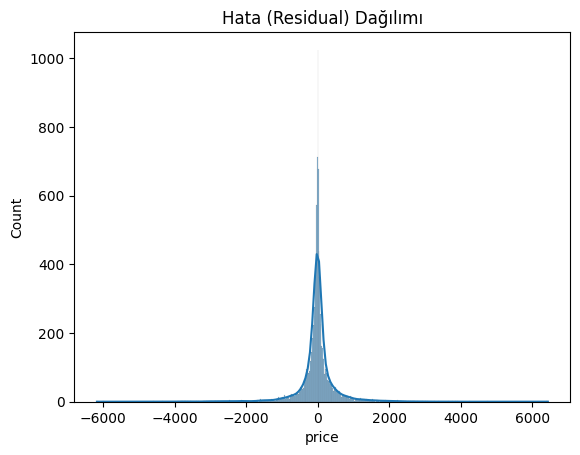

In [28]:
residuals = y_test - rf_pred
sns.histplot(residuals, kde=True)
plt.title('Hata (Residual) Dağılımı')
plt.show()